<a href="https://colab.research.google.com/github/ricardom98/equipo52_IA_AA/blob/main/Arboldedecision_Equipo52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.metrics import make_scorer

# Para Crear Arbol de Decisión como Imagen :
from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.ensemble import RandomForestClassifier

#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

In [2]:
#Carga del dataset en la variable df
url = 'https://raw.githubusercontent.com/ricardom98/equipo52_IA_AA/main/SouthGermanCredit.asc'

df = pd.read_csv(url, sep='\s+')
df.describe()


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [3]:
#Traduccion de los nombres de las columnas de aleman a ingles en la variable df_copy
df_copy = df.copy()
translated_cols = ["status", "duration", "credit_history", "purpose", "amount", "savings", 
                   "employment_duration", "installment_rate", "personal_status_sex", 
                   "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing",
                   "number_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk"]

df_copy.columns = translated_cols
df_copy

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#**Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida.

In [4]:
#Creacion de matrices con variables independientes X y variable dependiente Y 
X = df_copy.iloc[:,0:20] 
y = df_copy['credit_risk'] #Usamos corchetes simples para recibir una lista (1d y no tener que usar np.ravel(y) en cross validation)
print(X.shape)
print(y.shape)

(1000, 20)
(1000,)


In [5]:
#Particion del conjunto de entrenamiento del 85% y del de prueba de 15%
Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size = 0.15, random_state = 7)
print('Dimensión del conjunto de entrenamiento variables independientes: ', Xtv.shape)
print('Dimensión del conjunto de prueba variables independientes: ', Xtest.shape, '\n')
print('Dimensión del conjunto de entrenamiento variable dependiente: ', ytv.shape)
print('Dimensión del conjunto de prueba variable dependiente: ', ytest.shape)

Dimensión del conjunto de entrenamiento variables independientes:  (850, 20)
Dimensión del conjunto de prueba variables independientes:  (150, 20) 

Dimensión del conjunto de entrenamiento variable dependiente:  (850,)
Dimensión del conjunto de prueba variable dependiente:  (150,)


#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:

a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).

b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.

c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.

In [6]:
# Definimos las columnas que corresponden a cada tipo de dato

#Se establecen como variables categoricas aquellas que tienen un numero finito de valores posibles
names_pipeline_cat = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing'] 

#Se establecen como variables numericas aquellas que contienen un numero muy grande de valores enteros posibles 
names_pipeline_num = ['duration','amount','age']

#Se establecen como variables binarias aquellas que solo tienen dos valores posibles
names_pipeline_bin = ['people_liable','telephone','foreign_worker']

#Se establecen como variables ordinales aquellas variables que son categoricas y que tienen un orden logico entre sus valores. 
#Por ejemplo, la variable employment duration tiene valores entre 1 y 5, donde 1 es desempleado, 2 empleado hace menos de un año y asi en adeltante
# Estas variables cuentan con valores que tienen una correlación con la variable a la que representan 
# (A mayor valor de la variable ordinal, mayor impacto tiene esto en la representación de la variable a la que esta representando).

names_pipeline_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']

#Se unen tanto categoricas como binarias para transformación futura

names_pipeline_cat_bin = names_pipeline_cat + names_pipeline_bin


In [7]:
# Definimos las Pipelines

# Transformaciones a factores categóricos de entrada: remplazo por moda y aplicación de OneHotEncoder para crear columnas Dummies
pipeline_cat_bin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                  ('OneHotE', OneHotEncoder(handle_unknown = 'ignore'))])

# Transformaciones a factores numéricos de entrada: remplazo con promedio y escalación en rango 1 - 2
pipeline_num = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])

# Aplicamos las transformaciones a las columnas correspondientes con ColumnTransformer

transformaciones = ColumnTransformer( transformers = [
                                                      ('numtrans', pipeline_num, names_pipeline_num ),
                                                      ('catbintrans', pipeline_cat_bin, names_pipeline_cat_bin)],
                                                      remainder='passthrough')

#**Ejercicio-4.**

In [8]:
#Definimos los modelos que se compararán entre si
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(max_iter=3000))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RF - Random Forest:  
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  

  return modelos, nombres

In [9]:
# Se definen las métricas: accuracy, precision, recall, f1-score y Gmean

def nues_accuracy(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  accuracy = (vp + vn) / (vn + fp + fn + vp)
  return accuracy

def nues_precision(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  precision = vp / (vp + fp)
  return precision

def nues_recall(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  recall = vp / (vp + fn)
  return recall

def nues_f1score(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  f1score = (2*vp) / (2*vp + fp + fn)
  return f1score

def nues_gmean(yreal,ypred):
  cm = confusion_matrix(yreal,ypred).ravel()
  vn, fp, fn, vp = cm[0], cm[1], cm[2], cm[3]
  recall,specifity = vp / (vp + fn), vn / (vn + fp)
  gmean =  np.sqrt(recall*specifity)
  return gmean
  


In [10]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('transformaciones',transformaciones),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

  nuestras_metricas = {'accuracy':make_scorer(nues_accuracy),
                       'precision':make_scorer(nues_precision),
                       'recall':make_scorer(nues_recall),
                       'f1score':make_scorer(nues_f1score),
                       'gmean':make_scorer(nues_gmean)}

  resultadoscv = cross_validate(pipeline, Xtv, np.ravel(ytv), scoring=nuestras_metricas, cv=cv, return_train_score=True)


  resultados.append(resultadoscv)

  print('Train Scores:\n')
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' 
        % (nombres[i],
                                                                          np.mean(resultadoscv['train_accuracy']),
                                                                          np.std(resultadoscv['train_accuracy']), 
                                                                          np.mean(resultadoscv['train_precision']),
                                                                          np.std(resultadoscv['train_precision']), 
                                                                          np.mean(resultadoscv['train_recall']),
                                                                          np.std(resultadoscv['train_recall']),
                                                                          np.mean(resultadoscv['train_f1score']),
                                                                          np.std(resultadoscv['train_f1score']),
                                                                          np.mean(resultadoscv['train_gmean']),
                                                                          np.std(resultadoscv['train_gmean']),  
                                                                          ))

  print('\nTest Scores (Validation):\n')
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' 
        % (nombres[i],
                                                                          np.mean(resultadoscv['test_accuracy']),
                                                                          np.std(resultadoscv['test_accuracy']), 
                                                                          np.mean(resultadoscv['test_precision']),
                                                                          np.std(resultadoscv['test_precision']), 
                                                                          np.mean(resultadoscv['test_recall']),
                                                                          np.std(resultadoscv['test_recall']),
                                                                          np.mean(resultadoscv['test_f1score']),
                                                                          np.std(resultadoscv['test_f1score']),
                                                                          np.mean(resultadoscv['test_gmean']),
                                                                          np.std(resultadoscv['test_gmean']),  
                                                                          ))


Train Scores:

LR:
mean Accuracy: 0.793 (0.0069)
mean Precision: 0.818 (0.0062)
mean Recall: 0.910 (0.0079)
mean f1score: 0.862 (0.0046)
Gmean: 0.679 (0.0136)


Test Scores (Validation):

LR:
mean Accuracy: 0.759 (0.0239)
mean Precision: 0.797 (0.0182)
mean Recall: 0.886 (0.0255)
mean f1score: 0.839 (0.0168)
Gmean: 0.629 (0.0391)

Train Scores:

DT:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean f1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)


Test Scores (Validation):

DT:
mean Accuracy: 0.683 (0.0382)
mean Precision: 0.784 (0.0262)
mean Recall: 0.764 (0.0447)
mean f1score: 0.773 (0.0309)
Gmean: 0.607 (0.0479)

Train Scores:

RF:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean f1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)


Test Scores (Validation):

RF:
mean Accuracy: 0.758 (0.0242)
mean Precision: 0.781 (0.0125)
mean Recall: 0.915 (0.0356)
mean f1score: 0.842 (0.0182)
Gmean: 0.583 (0.0331)



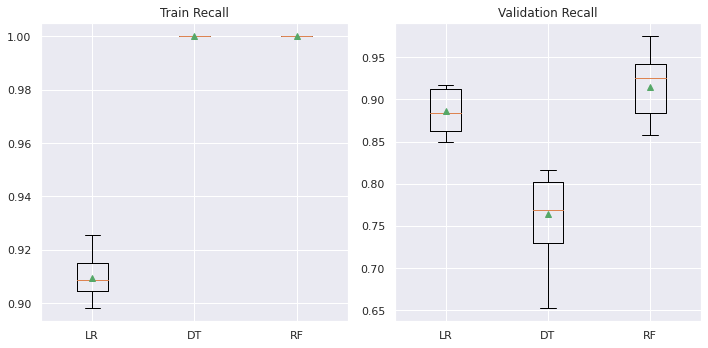

In [11]:
from matplotlib.axes import Subplot
#Se muestra en un BoxPlot los resultados correspondientes a la métrica Recall de los tres modelos
sns.set_theme(rc={'figure.figsize':(10,5)})
fig, axes = plt.subplots(1, 2)
axes[0].set_title("Train Recall")
axes[1].set_title("Validation Recall")


bpRecalltrain = list()
bpRecalltest = list()

for i in range(len(resultados)):
  results = resultados[i]['train_recall']
  bpRecalltrain.append(results)
  
for i in range(len(resultados)):
  results = resultados[i]['test_recall']
  bpRecalltest.append(results)

plt.subplot(1,2,1)
plt.boxplot(bpRecalltrain, labels=nombres, showmeans=True)
plt.title(label="Train Recall")
plt.subplot(1,2,2)
plt.boxplot(bpRecalltest, labels=nombres,showmeans = True)
plt.title(label="Validation Recall")

plt.tight_layout()
plt.show()



En base a los diagramas de caja y bigotes podemos ver que mientras los resultados para los datos de validación son relativamente buenos para la regresión logística y para el Random Forest, vemos que tanto el arbol de decisión como el Random Forest presentan un recall del 100% para el conjunto de entrenamiento, lo que da indicios que fueron sobreentrenados, especialmente el árbol de decisión pues tuvo una caída de desempeño muy grande en el conjunto de validación

## Curvas de Aprendizaje

### Regresión Logística

In [12]:
def nuestra_LearningCurvePlot(train_sizes, train_scores, val_scores):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('f1 score')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [13]:
def nues_ModeloYCurvas(Xin, indicemodelo):

  modelos, nombres = get_models()

  modelo = modelos[indicemodelo]
  pipeline = Pipeline(steps=[('transformaciones',transformaciones), ("modelo", modelo)])
  nues_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)
  delta_train_space = np.linspace(0.1,1,20, endpoint = True) #20 puntos (comenzamos en 10%, pasamos a 14.7% y asi hasta el 100% de los datos de entrenamiento)

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xtv,
                                                        y = ytv,
                                                        cv = nues_cv,
                                                        scoring = make_scorer(nues_f1score),                                               
                                                        train_sizes = delta_train_space,
                                                        random_state=11)
       
  nuestra_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo lineal:


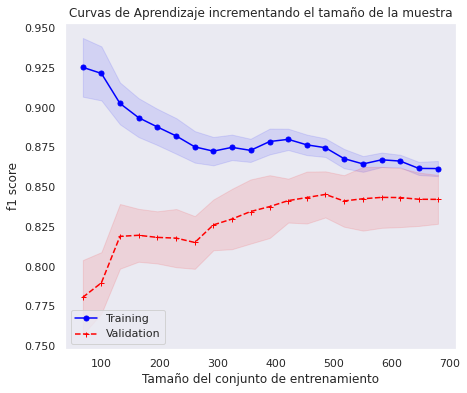

In [14]:
print('Curvas de aprendizaje del modelo lineal:')
nues_ModeloYCurvas(Xtv, 0)

### Árbol de decisión

In [15]:
def nuestra_ValidationCurvePlot(train_scores, val_scores, delta_depth_space):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(delta_depth_space, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(delta_depth_space, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(delta_depth_space, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(delta_depth_space, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Profundidad del árbol')
    plt.ylabel('f1 score')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [16]:
def nues_ModeloYCurvasDT(Xin, indicemodelo ):

  modelos, nombres = get_models()

  Xtransf = transformaciones.fit_transform(Xtv)
  modelo = modelos[indicemodelo]
  pipeline = Pipeline(steps=[('transformaciones',transformaciones), ("modelo", modelo)])
  nues_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)
  delta_depth_space = np.linspace(1,20,20, endpoint = True) #20 puntos (comenzamos en 1, pasamos a 2 y así hasta 20)

  train_scores, val_scores = validation_curve(estimator = modelo,    
                                                        X = Xtransf,
                                                        y = ytv,
                                                        param_name = 'max_depth',
                                                        param_range = delta_depth_space,
                                                        cv = nues_cv,
                                                        scoring = make_scorer(nues_f1score)                                               
                                                        )
       
  nuestra_ValidationCurvePlot(train_scores, val_scores, delta_depth_space)

Curvas de aprendizaje del Arbol de decisión:


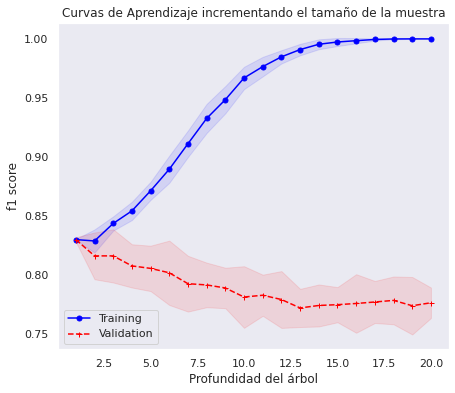

In [17]:
print('Curvas de aprendizaje del Arbol de decisión:')
nues_ModeloYCurvasDT(Xtv, 1)

### Bosque Aleatorio

In [18]:
def nuestra_LearningCurvePlotRF(train_sizes, train_scores, val_scores):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('recall')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [19]:
def nues_ModeloYCurvasRF(Xin, indicemodelo):

  modelos, nombres = get_models()

  modelo = modelos[indicemodelo]
  pipeline = Pipeline(steps=[('transformaciones',transformaciones), ("modelo", modelo)])
  nues_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)
  delta_train_space = np.linspace(0.1,1,20, endpoint = True) #20 puntos (comenzamos en 10%, pasamos a 14.7% y asi hasta el 100% de los datos de entrenamiento)

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xtv,
                                                        y = ytv,
                                                        cv = nues_cv,
                                                        scoring = make_scorer(nues_recall),                                               
                                                        train_sizes = delta_train_space,
                                                        random_state=11)
       
  nuestra_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del Bosque Aleatorio:


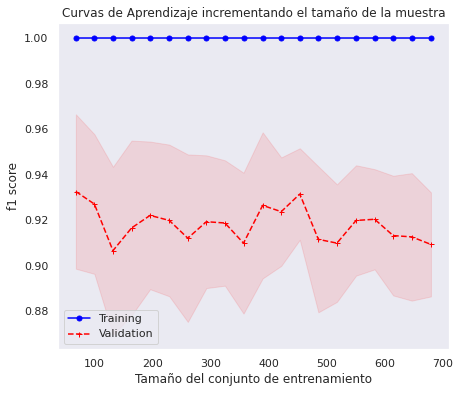

In [20]:
print('Curvas de aprendizaje del Bosque Aleatorio:')
nues_ModeloYCurvasRF(Xtv, 2)

### Todas las Curvas

In [21]:
'''#Se muestra en un BoxPlot los resultados correspondientes a la métrica Recall de los tres modelos
sns.set_theme(rc={'figure.figsize':(21,18)})
fig, axes = plt.subplots(1, 3)
axes[0].set_title("Train - Val Logistic Regression")
axes[1].set_title("Train - Val Decision Tree")
axes[2].set_title("Train - Val Random Forest")

plt.subplot(1,3,1)
nues_ModeloYCurvas(Xtv, 0)

plt.subplot(1,3,2)
nues_ModeloYCurvasDT(Xtv, 1)

plt.subplot(1,3,3)
nues_ModeloYCurvasRF(Xtv, 2)'''


'#Se muestra en un BoxPlot los resultados correspondientes a la métrica Recall de los tres modelos\nsns.set_theme(rc={\'figure.figsize\':(21,18)})\nfig, axes = plt.subplots(1, 3)\naxes[0].set_title("Train - Val Logistic Regression")\naxes[1].set_title("Train - Val Decision Tree")\naxes[2].set_title("Train - Val Random Forest")\n\nplt.subplot(1,3,1)\nnues_ModeloYCurvas(Xtv, 0)\n\nplt.subplot(1,3,2)\nnues_ModeloYCurvasDT(Xtv, 1)\n\nplt.subplot(1,3,3)\nnues_ModeloYCurvasRF(Xtv, 2)'

#**Ejercicio-5.**

Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. Puedes consultar su documentación de GridSearchCV en la siguiente liga: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.

b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones.

d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones. NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo

f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

### GridSearchCV Regresión Logística

In [22]:
modeloLR = LogisticRegression(max_iter=1000000, random_state=11)

# C, solver, class_weight y penalty. 

pipeline = Pipeline(steps=[('transformaciones',transformaciones), ("modelo", modeloLR)])

c_param = [0.0001,0.01,0.1,1.0,10.,100.]
#dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.],
#             'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
#             'class_weight': ['balanced', None],
#             'penalty':['l1', 'l2', 'elasticnet', None]
#             }

#dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.],
#             'solver':['newton-cg'],
#             'class_weight': ['balanced', None],
#             'penalty':['l2','none']
#             }

dicc_grid = [
 
        {'penalty': ['l1'], 'solver': [ 'saga'], 'class_weight':['balanced', None], 'C': c_param},
        {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'class_weight':['balanced', None], 'C': c_param},
        {'penalty': ['elasticnet'], 'solver': ['saga'], 'class_weight':['balanced', None], 'C': c_param, 'l1_ratio': [0.5]},
        {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'class_weight':['balanced', None]}
    ]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

grid = GridSearchCV(estimator=modeloLR, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=make_scorer(nues_f1score))

In [23]:
import warnings
warnings.filterwarnings('ignore')

Xtransf = transformaciones.fit_transform(Xtv)
grid.fit(Xtransf, ytv)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8473371695588586
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
Métrica utilizada: make_scorer(nues_f1score)


#### **Curvas de Aprendizaje para los Hiperparametros:** 
'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'

In [24]:
def nues_ModeloYCurvasLRBestHP(Xin):

  modelo = LogisticRegression(penalty = 'l2', C = 0.1, class_weight = None, solver ='newton-cg')
  pipeline = Pipeline(steps=[('transformaciones',transformaciones), ("modelo", modelo)])
  nues_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)
  delta_train_space = np.linspace(0.1,1,20, endpoint = True) #20 puntos (comenzamos en 10%, pasamos a 14.7% y asi hasta el 100% de los datos de entrenamiento)

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xtv,
                                                        y = ytv,
                                                        cv = nues_cv,
                                                        scoring = make_scorer(nues_f1score),                                               
                                                        train_sizes = delta_train_space,
                                                        random_state=11)
       
  nuestra_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo lineal mejores Hiperparametros:


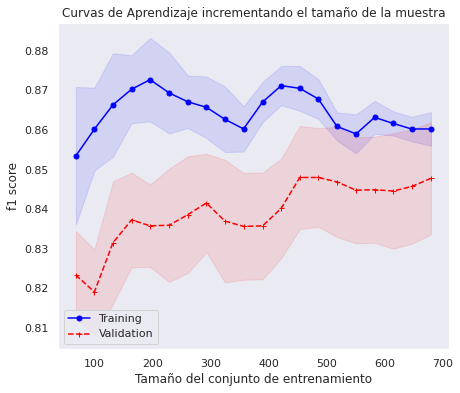

In [25]:
print('Curvas de aprendizaje del modelo lineal mejores Hiperparametros:')
nues_ModeloYCurvasLRBestHP(Xtv)

### GridSearchCV Árbol de decisión

In [26]:
modeloDT = DecisionTreeClassifier()

# cp_alpha, criterion, max_depth, min_samples_split y class_weigh 

pipeline = Pipeline(steps=[('transformaciones',transformaciones), ("modelo", modeloDT)])

dicc_grid = {'modelo__ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
             'modelo__criterion':['gini', 'entropy', 'log_loss'],
             'modelo__max_depth': [1,2,8,16,32, None],
             'modelo__min_samples_split':[2,3],
             'modelo__class_weight':['balanced', None]
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

grid = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=make_scorer(nues_precision))

In [27]:
grid.fit(Xtv, ytv)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8832631462620708
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__ccp_alpha': 0.0001, 'modelo__class_weight': 'balanced', 'modelo__criterion': 'gini', 'modelo__max_depth': 1, 'modelo__min_samples_split': 2}
Métrica utilizada: make_scorer(nues_precision)


#### **Curvas de Aprendizaje para los Hiperparametros:** 
'modelo__ccp_alpha': 0.0001, 'modelo__class_weight': 'balanced', 'modelo__criterion': 'gini', 'modelo__max_depth': 1, 'modelo__min_samples_split': 2

In [28]:
def nues_ModeloYCurvasDTBestHP(Xin):

  modeloDT = DecisionTreeClassifier(ccp_alpha = 0.0001, class_weight = 'balanced', criterion = 'gini', max_depth = 1, min_samples_split = 2)
  pipeline = Pipeline(steps=[('transformaciones',transformaciones), ("modelo", modeloDT)])
  nues_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)
  delta_train_space = np.linspace(0.1,1,20, endpoint = True) #20 puntos (comenzamos en 10%, pasamos a 14.7% y asi hasta el 100% de los datos de entrenamiento)

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xtv,
                                                        y = ytv,
                                                        cv = nues_cv,
                                                        scoring = make_scorer(nues_precision),                                               
                                                        train_sizes = delta_train_space,
                                                        random_state=11)
       
  nuestra_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo árbol de decisión mejores Hiperparametros:


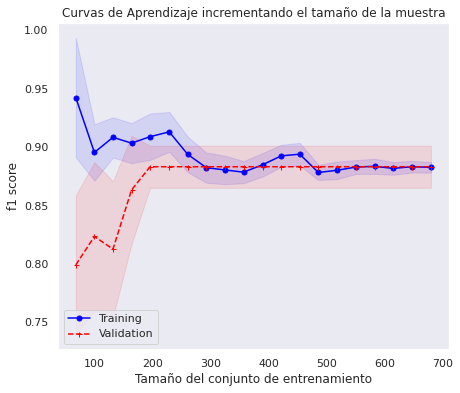

In [29]:
print('Curvas de aprendizaje del modelo árbol de decisión mejores Hiperparametros:')
nues_ModeloYCurvasDTBestHP(Xtv)

### GridSearchCV Bosque Aleatorio

In [42]:
modeloRF = RandomForestClassifier()

# cp_alpha, criterion, max_depth, min_samples_split y class_weigh 

pipeline = Pipeline(steps=[('transformaciones',transformaciones), ("modelo", modeloRF)])

dicc_grid = {'modelo__ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
             'modelo__criterion':['gini', 'entropy', 'log_loss'],
             'modelo__max_depth': [1,2,8, None],
             'modelo__min_samples_split':[2,3],
             'modelo__class_weight':['balanced', None]
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

grid = GridSearchCV(estimator=pipeline, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=make_scorer(nues_recall))

In [45]:
grid.fit(Xtv, ytv)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'modelo__ccp_alpha': 0.0001, 'modelo__class_weight': None, 'modelo__criterion': 'gini', 'modelo__max_depth': 1, 'modelo__min_samples_split': 2}
Métrica utilizada: make_scorer(nues_recall)


#### **Curvas de Aprendizaje para los Hiperparametros:** 
'modelo__ccp_alpha': *, 'modelo__class_weight': *, 'modelo__criterion': '*, 'modelo__max_depth': *, 'modelo__min_samples_split': *

In [47]:
def nues_ModeloYCurvasRFBestHP(Xin):

  modeloRF = DecisionTreeClassifier(ccp_alpha = 0.0001, class_weight = 'balanced', criterion = 'gini', max_depth = 1, min_samples_split = 2)
  pipeline = Pipeline(steps=[('transformaciones',transformaciones), ("modelo", modeloRF)])
  nues_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)
  delta_train_space = np.linspace(0.1,1,20, endpoint = True) #20 puntos (comenzamos en 10%, pasamos a 14.7% y asi hasta el 100% de los datos de entrenamiento)

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                        X = Xtv,
                                                        y = ytv,
                                                        cv = nues_cv,
                                                        scoring = make_scorer(nues_recall),                                               
                                                        train_sizes = delta_train_space,
                                                        random_state=11)
       
  nuestra_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo árbol de decisión mejores Hiperparametros:


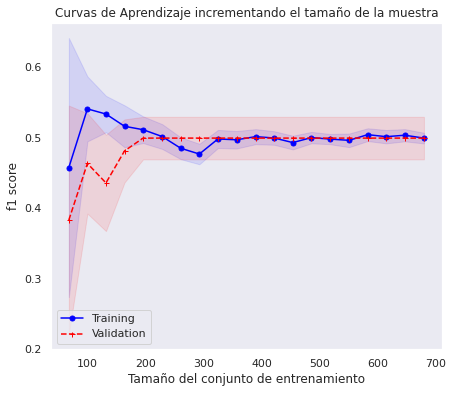

In [48]:
print('Curvas de aprendizaje del modelo árbol de decisión mejores Hiperparametros:')
nues_ModeloYCurvasRFBestHP(Xtv)

#**Ejercicio-6.**

Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación:
a. Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido.

b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

## 6a - Modelo Regresión logística

In [51]:
modeloLR = LogisticRegression(penalty = 'l2', C =  0.1, class_weight = None, solver = 'newton-cg')

modeloLR.fit(Xtransf, ytv)

yhatLR = modeloLR.predict(Xtransf)

scoreLR = nues_f1score(ytv, yhatLR)

print(scoreLR)

0.8604118993135011


### Conslusión 6 - a

Tras correr el modelo de regresión logística con los mejores hiperparámetros se obtiene un incremento del 1.31% en el f1-score, pasando de un 84.73% a un 86.04%. Teniendo presente que el f1-score corresponde a la media armónica del precision y recall, se concluye que los hiperparámetros logran aumentar la cantidad de verdaderos positivos en las predicciones del modelo final.

## 6b - Modelo Árbol de decisión

In [ ]:
modeloDT = DecisionTreeClassifier(ccp_alpha = 8.0201, class_weight = 'balanced', criterion = 'gini', max_depth = 1.0, min_samples_split = 0.0001)
# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modeloDT.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeno del modelo:

Xxtest = Xct.transform(Xtest)
score = modeloDT.score(Xxtest, np.ravel(ytest))
print ("score: "+ str(score))

pp = modeloDT.predict (Xxtest)
cm = confusion_matrix(ytest, pp)
printConsufionMatrix(cm)

mydata = load_iris()
c1f = modeloDT. fit (Xtv, ytv) # Entrenamos con el conjunto de prueba para obtener nuestro primer clasificador (c1f)

dot_data = tree.export_graphviz(decision_tree=c1f,
                                out_file = None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(Xtv).columns.values),
                                class_names=[mydata.target_names[0],mydata.target_names[1],mydata.target_names[2]],
                                filled = True,
                                rotate = True, 
                                proportion = False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###**Fin de la Actividad de la semana 6.**